This notebook will calculate numerical derivatives of sin(x), using for loops.

25132


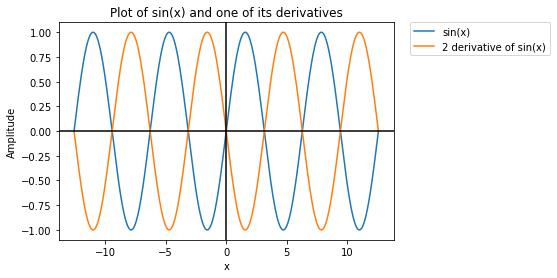

In [44]:
#This cell will calculate numerical derivatives of sin(x)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import math
plt.clf()
xstart=-4*math.pi #left endpoint of the interval
xend=4*math.pi #right endpoint of the interval
xrange=np.linspace(xstart,xend,num=int(1000*(xend-xstart))) #The interval over which the function and its derivatives are evaluated
print(len(xrange))
stepsize=xrange[1]-xrange[0] #The stepsize used when differentiating

# The derivative the user would like to plot. You can change this if you wish.
deriv_wanted=2
derivs=np.zeros((len(xrange),deriv_wanted+1)) #array where each column represents a derivative of sin(x)
derivs[:,0]=np.sin(xrange) #The zeroth column of the derivs array is the function itself

#This outer for loop will loop through the different derivatives you want to calculate
for deriv_index in range(1,deriv_wanted+1):
    #These two lines will approximate the derivative at the end-points by finding the slope of the line that connects the 
    #values of the function at the endpoints to the closest point in the interval.
    derivs[0,deriv_index]=(derivs[1,deriv_index-1]-derivs[0,deriv_index-1])/stepsize
    derivs[-1,deriv_index]=(derivs[-1,deriv_index-1]-derivs[-2,deriv_index-1])/stepsize
    #This inner for loop will loop through the xvalues for each derivative, and calculate the numerical derivative values there.
    #It will do this by using the approximation that the derivative of a function at x is the slope of the line connecting the 
    #function's values at x-h and x+h where h is small.
    for x_index in range(1,len(xrange)-1):
        derivs[x_index,deriv_index]=(derivs[x_index+1,deriv_index-1]-derivs[x_index-1,deriv_index-1])/(2*stepsize)
        

plt.plot(xrange,np.sin(xrange),label='sin(x)')
plt.plot(xrange,derivs[:,deriv_wanted],label='%d derivative of sin(x)'%deriv_wanted)
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.title('Plot of sin(x) and one of its derivatives')
plt.axhline(y=0,color='k')
plt.axvline(x=0,color='k')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()